<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

#  **Model Building End-to-End Series**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section2)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Loading data using Pandas**](#Section4)<br>

**5.** [**Seperating data into Train and Test sets**](#Section5)<br>

**6.** [**Model Building**](#Section6)<br>

**7.** [**Model Evaluation**](#Section7)<br>

---
<a name = Section2></a>
# **1. Introduction**
---


- Depending on the **data type** (qualitative or quantitative) of the **target variable** (commonly referred to as the Y variable) we are either going to be building a **classification** (if Y is qualitative) or **regression** (if Y is quantitative) model. 

- **Machine learning algorithms** could be broadly categorised to one of **three** types:
  - **Supervised learning** — is a machine learning task that establishes the mathematical relationship between input X and output Y variables. Such X, Y pair constitutes the labeled data that are used for model building in an effort to learn how to predict the output from the input.

  - **Unsupervised learning** — is a machine learning task that makes use of only the input X variables. Such X variables are unlabeled data that the learning algorithm uses in modeling the inherent structure of the data.

  - **Reinforcement learning** — is a machine learning task that decides on the next course of action and it does this by learning through trial and error in an effort to maximize the reward

---
<a name = Section2></a>
# **2. Problem Statement**
---

Due to the **boom** in the telecom industry with **4G technology**, it has become a pain in the neck for the company to **retain their customers**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Telecom/churn2.png"width="350" height="220"/></center>

- They are in the **middle** of setting up more **cell sites** on the **4G network** to improve their **4G services**.

-  It is **plausible** for customers to choose **4G services** over **3G services** due to benefits of **cost,speed, latency etc**.



- Till now they have been using manual traditional ways which now has become a problem to handle due to work complication.

<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-2/master/images/87217572-51866a00-c368-11ea-90b5-dd2e28fd00de.jpg"width="400" height="280"/></center>

- They have a detailed history of their customers and are looking for an automated solution toidentify the likeliness of customer churning from using their services.

- The data is **stored** in their **MongoDB** and you need to **extract to move further with your Data Science skills**.

---
<a name = Section3></a>
# **3. Importing Libraries**
---


### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

---
<a name = Section4></a>
# **4. Loading data using Pandas**
---

In [3]:
data = pd.read_csv("C:/Users/lenovo/Downloads/Cleaned_Churn.csv")
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1.0,0,0,1,2,29.85,0
1,34.0,1,1,0,3,56.95,0
2,2.0,1,0,1,3,53.85,1
3,45.0,0,1,0,0,42.30,0
4,2.0,1,0,1,2,70.70,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   float64
 1   PhoneService      7043 non-null   int64  
 2   Contract          7043 non-null   int64  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 385.3 KB


---
<a name = Section4></a>
# **5. Separating data into train and test sets**
---

<a id=section5></a>
## 5.1 Separating Independent and Dependent variables

In [5]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [6]:
X.shape

(7043, 6)

In [7]:
y.shape

(7043,)

<a id=section5></a>
## 5.2 Splitting data into train and test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

---
<a name = Section6></a>
# **6. Model Building**
---

In [9]:
#Logistic Regression

log_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(estimator=log_model, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.85511695 0.83171907 0.81196357 0.84895992 0.82021475]
Mean 0.8335948533498835


In [10]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
scores = cross_val_score(estimator=decision_tree, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.7998653  0.78148453 0.75480185 0.78344967 0.74957882]
Mean 0.7738360349451494


In [11]:
model_rf = RandomForestClassifier()

In [12]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
scores = cross_val_score(estimator=model_rf, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.86385174 0.83833038 0.82180859 0.85553511 0.82081394]
Mean 0.8400679495277237


### 6.1 CHECKING FEATURE IMPORTANCE

In [13]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [14]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Contract : 34.28860483552098 %
Feature importance of tenure : 30.594581810798783 %
Feature importance of MonthlyCharges : 21.73101486021982 %
Feature importance of PaymentMethod : 8.123568638293088 %
Feature importance of PaperlessBilling : 4.406016326941685 %
Feature importance of PhoneService : 0.8562135282256437 %


In [15]:
model_rf.feature_importances_*100

array([30.59458181,  0.85621353, 34.28860484,  4.40601633,  8.12356864,
       21.73101486])

Text(0.5, 1.0, 'Feature Importance of each Feature')

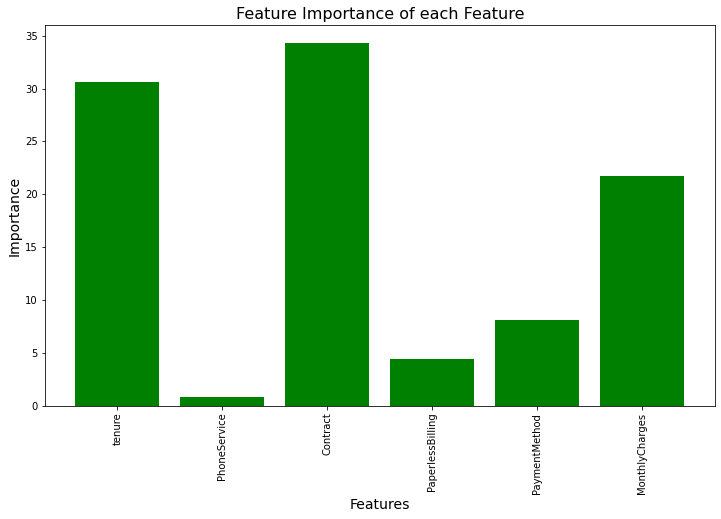

In [16]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, model_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

### 6.2 HYPERPARAMETER TUNING

In [17]:
param_grid = [{'n_estimators': [100, 200, 300],
               'max_depth': [None, 2, 3, 10, 20],
               'max_features': ['auto', 2, 4, 8, 16, 'log2', None]}]

In [18]:
temp_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [19]:
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [20]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 1min 34s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['auto', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [21]:
# Calculating the best RMSE score found by Grid Search 
grid_search.best_score_

0.8349116880067996

In [22]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 300}

### **6.3 FINAL MODEL**

In [23]:
# Creating the final random forest model from the grid search's best estimator.
final_rf = grid_search.best_estimator_

In [24]:
# Fitting the final model with training set
final_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, n_jobs=-1, random_state=0)

In [25]:
# Making predictions on the train set
y_train_pred = final_rf.predict(X_train)

In [26]:
# Making predictions on the test set
y_test_pred = final_rf.predict(X_test)

###  **Saving the model as Pickle String**

In [27]:
import pickle

In [28]:
pickle.dump(final_rf, open("randomforest.pkl","wb"))

---
<a name = Section7></a>
# **7. Model Evaluation**
---

### **CONFUSION MATRIX**

In [29]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

In [30]:
confusion_mat.index = ['Actual Negative', 'Actual Positive']
confusion_mat.columns = ['Predicted Negative', 'Predicted Positive']
confusion_mat

,Predicted Negative,Predicted Positive
Actual Negative,505,28
Actual Positive,121,51


### **ACCURACY SCORE**

In [31]:
# Accuracy score on the training set.
print('Accuracy score for train data is:', accuracy_score(y_train, y_train_pred))

Accuracy score for train data is: 0.7881035026822342


In [32]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test, y_test_pred))

Accuracy score for test data is: 0.7886524822695036


### **Precision Score**

In [33]:
# Precision score on the training set.
print('Accuracy score for train data is:', precision_score(y_train, y_train_pred))

Accuracy score for train data is: 0.7169117647058824


In [34]:
# Precision score on the test set.
print('Accuracy score for test data is:', precision_score(y_test, y_test_pred))

Accuracy score for test data is: 0.6455696202531646


### **Recall Score**

In [35]:
# recall score on the training set.
print('Accuracy score for train data is:', recall_score(y_train, y_train_pred))

Accuracy score for train data is: 0.3447259870359458


In [36]:
# recall score on the test set.
print('Accuracy score for test data is:', recall_score(y_test, y_test_pred))

Accuracy score for test data is: 0.29651162790697677
